In [46]:
import tensorflow as tf
tf.__version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from tensorflow.keras.datasets import mnist

import numpy as np

def GenerateModel():
    imgDim = (28,28,1)#28x28 image with 1 grey scale channel
    model = Sequential()
    model.add(Input(shape=imgDim), )
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    model.summary()
    
    return model


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

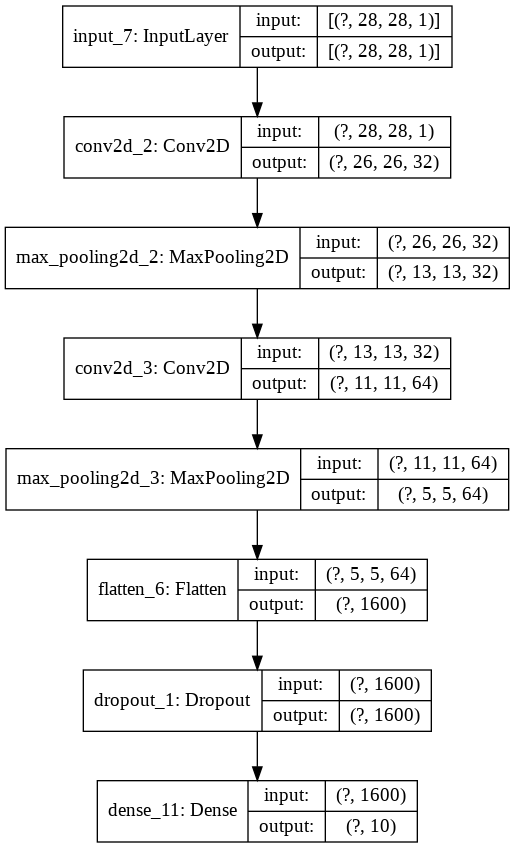

In [29]:
model = GenerateModel()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
plot_model(model, to_file='model.png', show_shapes=True)

In [38]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

batchSize = 32

In [ ]:
hist = model.fit(
    x=x_train,
    y=y_train,
    batch_size = batchSize,
    epochs=100)

Epoch 1/100
1875/1875 [==============================] - 49s 26ms/step - loss: 9.8917 - accuracy: 0.0987
Epoch 2/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8916 - accuracy: 0.1006
Epoch 3/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8917 - accuracy: 0.1000
Epoch 4/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8917 - accuracy: 0.1009
Epoch 5/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8916 - accuracy: 0.0994
Epoch 6/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8917 - accuracy: 0.1019
Epoch 7/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8917 - accuracy: 0.1008
Epoch 8/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8916 - accuracy: 0.1001
Epoch 9/100
1875/1875 [==============================] - 50s 27ms/step - loss: 9.8916 - accuracy: 0.0995
Epoch 10/100
1875/1875 [==============================]

In [47]:
for epoch in range(300):
    idx = np.random.randint(0, x_train.shape[0], batchSize)
    bx = x_train[idx]
    by = y_train[idx]
    
    loss = model.train_on_batch(bx, by)
    # print("Loss %f" % loss[0])

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
digit = model.predict(x_test)
print("digit predict:",digit[0])
print("truth is ", y_test[0])